ref: https://dacon.io/competitions/official/235743/codeshare

## target feature

In [ ]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

train.profile_report()

In [ ]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

train_test.profile_report()

In [ ]:
# 분석
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# 경고
import warnings
warnings.filterwarnings(action='ignore')

# 날짜 가공
import datetime as dt 
from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# 데이터 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Gothic') # For Windows. PLOT에서 한글 처리 -> 플롯 만드는 창에 넣어야 됨.

plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15

%matplotlib inline 


# plt.figure(figsize=(12,4)) # plot 12:4 비율

import seaborn as sns
sns.set() # seaborn에서 회색 grid 깔아줌
sns.set(rc={'figure.figsize':(18, 5)}) # 결과 plot 크기 키워줌

# re
import re

In [ ]:
# 사이킷런
from sklearn.model_selection import train_test_split

# 사이킷런 분류
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import LinearSVC

# 사이킷런 분류 점수
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# 						 # ---> y_true, y_pred
# from sklearn.metrics import precision_recall_curve # y_true, probas_pred
# from sklearn.metrics import roc_auc_score, roc_curve # y_true, y_score

# 분류 ensemble
# import xgboost as xgb
# from xgboost import plot_importance 
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier # lgb.쓰기 귀찮으니까 Classifier까지 import
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
# 사이킷런 회귀
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.svm import SVC #linear SVC는 classifier 성 / SVC는 분류말고 회귀에도 쓸 수 있다.

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 사이킷런 회귀 점수
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score # squared=False로 하면 RMSE

In [ ]:
# 사이킷런 스케일러
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# 사이킷런 학습 데이터 증강
# Stratifietrain_testold는 회귀에서는 X
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

# DataLoad & pre-setting

## DataLoad

In [ ]:
train=pd.read_csv('./dataset/train.csv', parse_dates=['일자']) # date type
test=pd.read_csv('./dataset/test.csv', parse_dates=['일자'])   # date type
sub=pd.read_csv('./dataset/sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 113.1+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              50 non-null     datetime64[ns]
 1   요일              50 non-null     object        
 2   본사정원수           50 non-null     int64         
 3   본사휴가자수          50 non-null     int64         
 4   본사출장자수          50 non-null     int64         
 5   본사시간외근무명령서승인건수  50 non-null     int64         
 6   현본사소속재택근무자수     50 non-null     float64       
 7   조식메뉴            50 non-null     object        
 8   중식메뉴            50 non-null     object        
 9   석식메뉴            50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 4.0+ KB


In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      50 non-null     object
 1   중식계     50 non-null     int64 
 2   석식계     50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


## function

### scoring

In [ ]:
def my_mae(true, pred):
    mae = np.mean(np.abs(true-pred))
    return mae

### train_test: concate

In [ ]:
def my_concat(train_df, test_df):
    train_test_df=pd.concat([train_df, test_df], axis=0)
    return train_test_df

### train_test: split

In [ ]:
def my_split(train_test_df):
    train_df=train_test_df[~train_test_df['중식계'].isna()] # iloc으로 자르지 않은 이유는 행을 삭제할 수도 있기 때문
    test_df=train_test_df[train_test_df['중식계'].isna()]
    test_df=test_df.drop(['중식계', '석식계'], axis=1)
    return train_df, test_df

### fit & score & submit

In [ ]:
# def my_train_val_split(X, y, cutoff_day=15):
#     X_train=X[X.index.day <= cutoff_day]
#     X_val=X[X.index.day > cutoff_day]
#     y_train=y[y.index.day <= cutoff_day]
#     y_val=y[y.index.day > cutoff_day]
    
    
#     return X_train, X_val, y_train, y_val

In [ ]:
# def my_fit_score(train_test, target, model=None, submit_name=None, target_log=False):
    
#     train, test = my_split(train_test)

#     # ------------------------------------------- train & validation
#     X=train.drop(target, axis=1)
#     y=train[target]

#     X_train, X_val, y_train, y_val=my_train_val_split(X,y,shuffle=True,random_state=1024)

#     # ---defualt model is RandomForestRegressor()
    
#     if model ==None:
#         model=RandomForestRegressor()

#     model.fit(X_train, y_train)
#     pred=model.predict(X_val)
#     rmsle = mean_squared_log_error(y_val, pred, squared=False)
#     print(f"RMSLE:{rmsle:.4f} {model.__class__.__name__}") # mean_squared_log_error(squred=False)

#     #------------------------------------------ test submit

#     if submit_name != None:
#         test_pred=model.predict(test)
        
#         if target_log==True:
#             test_pred=np.expm1(test_pred)
        
#         # test_pred=np.round(test_pred, 0).astype('int') #---> 결과 int로 주라고 했다.(반올림 후 astype('int'))
#         submit['count']=test_pred.reshape(-1,1)
#         submit.to_csv(f'./dataset/{submit_name}.csv', index=False)
        

### split & fit & scoring

In [ ]:
def reg_fit_score(train_test, target, model_list):
    
    train, test = my_split(train_test)
    
    # ------------------------------------------- train & validation
    X=train.drop(['중식계','석식계'], axis=1)
    y=train[target]
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1024)

    if model_list==False:
        model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge()]
        
    score_list=[]
    
    f, axs = plt.subplots(1, 4, figsize=(18, 4))
    
    for i, model in enumerate(model_list):
        model.fit(X_train, y_train)
        # print(X.columns)
        # print(model.coef_)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=model.coef_, y=X.columns, ax=axs[i])
        
        pred=model.predict(X_val)
        score=my_mae(y_val, pred)
        score_list.append(score)
        
        # print(f"{model.__class__.__name__}:\n\t{score[model.__class__.__name__]} ---> {score:.6f}")
    plt.show()
    return score_list

In [ ]:
def tree_fit_score(train_test, target, model_list):
    
    train, test = my_split(train_test)

    # ------------------------------------------- train & validation
    y=train[target]
    X=train.drop(['중식계','석식계'], axis=1)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1024)
    
    if model_list==False:
        model_list = [XGBRegressor(),LGBMRegressor()]    
    
    score_list=[]
    
    f, axs = plt.subplots(1,2, figsize=(16,4))
    
    for i, model in enumerate(model_list):
        model.fit(X_train, y_train)
        #print(model.feature_importances_)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(y=X.columns, x=model.feature_importances_, ax=axs[i])
            
        pred=model.predict(X_val)
        score=my_mae(y_val, pred)
        score_list.append(score)
        
        # print(f"{model.__class__.__name__}:\n\t{score[model.__class__.__name__]} ---> {score:.6f}")
    return score_list

In [ ]:
def reg_stacking_fit_score(train_test, target):
    
    train, test = my_split(train_test)

    # ------------------------------------------- train & validation
    y=train[target]
    X=train.drop(['중식계','석식계'], axis=1)
    
    model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge()]
    score_list=[]
    
    f, axs = plt.subplots(1, 4, figsize=(18, 4))
    
    # -------- loop model
    for i, model in enumerate(model_list):
        
        # -------- KFold
        kfold = KFold(n_splits=3, shuffle=True, random_state=1024)
        fold_score_list = []
        fold_coef_array=np.zeros((3, X.shape[1]))
        
        j=0
        
        for train_index, test_index  in kfold.split(X, y) :
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            
            score=my_mae(y_test, pred)
            fold_score_list.append(score)
            
            fold_coef_array[j,]=model.coef_
            j=j+1
        
        # -------- score
        mean_score=np.array(fold_score_list).mean()
        score_list.append(mean_score)

        # -------- barplot        
        mean_coef_=fold_coef_array.mean(axis=0)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=mean_coef_, y=X.columns, ax=axs[i])
    
    return score_list

In [ ]:
def tree_stacking_fit_score(train_test, target):
    train, test = my_split(train_test)

    # ------------------------------------------- train & validation
    y=train[target]
    X=train.drop(['중식계','석식계'], axis=1)
    
    model_list = [XGBRegressor(),LGBMRegressor()]    
    score_list=[]
    
    f, axs = plt.subplots(1,2, figsize=(16,4))
    
    # -------- loop model
    for i, model in enumerate(model_list):
        
        # -------- KFold
        kfold = KFold(n_splits=3, shuffle=True, random_state=1024)
        fold_score_list = []
        fold_importance_array=np.zeros((3, X.shape[1]))
        
        j=0
        
        for train_index, test_index  in kfold.split(X, y) :
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            
            score=my_mae(y_test, pred)
            fold_score_list.append(score)
            
            fold_importance_array[j,]=model.feature_importances_
            j=j+1
        
        # -------- score
        mean_score=np.array(fold_score_list).mean()
        score_list.append(mean_score)

        # -------- barplot        
        mean_impo_=fold_importance_array.mean(axis=0)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=mean_impo_, y=X.columns, ax=axs[i])
    
    return score_list

In [ ]:
# empty score dataframe
index_list=['LinearRegression()','Lasso()','ElasticNet()','Ridge()', 'XGBRegressor()','LGBMRegressor()']
sco_df=pd.DataFrame(index=index_list)

# fit & score & make score dataframe
def fit_score(data, target, model_list=False, trial_name, DF=True):
    
    reg_score_list=reg_fit_score(data, target, model_list)
    tree_score_list=tree_fit_score(data, target, model_list)
    score_list=reg_score_list+tree_score_list
    
    index_list=['LinearRegression()','Lasso()','ElasticNet()','Ridge()', 'XGBRegressor()','LGBMRegressor()']
    score_series=pd.Series(score_list, index=index_list, name=trial_name)
    
    if DF==True:
        global sco_df
        sco_df=pd.concat([sco_df, score_series], axis=1)
        return sco_df
    else:
        print(score_series)
    

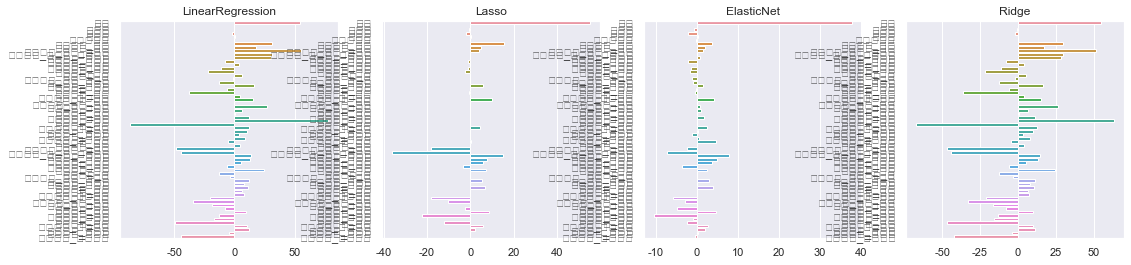

LinearRegression()    87.103136
Lasso()               84.117376
ElasticNet()          86.723647
Ridge()               86.703439
XGBRegressor()        71.661202
LGBMRegressor()       71.454601
Name: 하위, dtype: float64


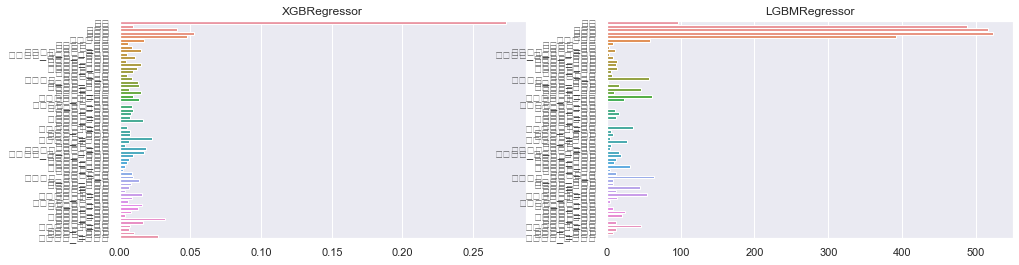

In [ ]:
fit_score(train_test, '중식계','하위', DF=False)

In [ ]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1212 entries, 2016-02-01 to 2021-04-09
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   요일             1212 non-null   int64  
 1   정원             1212 non-null   int64  
 2   휴가자            1212 non-null   int64  
 3   출장자            1212 non-null   int64  
 4   야근자            1212 non-null   int64  
 5   재택근무자          1212 non-null   float64
 6   중식계            1162 non-null   float64
 7   석식계            1162 non-null   float64
 8   중식메뉴_육류        1212 non-null   int64  
 9   중식메뉴_난류        1212 non-null   int64  
 10  중식메뉴_덮밥_국밥류    1212 non-null   int64  
 11  중식메뉴_비빔밥_볶음밥류  1212 non-null   int64  
 12  중식메뉴_국탕류       1212 non-null   int64  
 13  중식메뉴_구이류       1212 non-null   int64  
 14  중식메뉴_전류        1212 non-null   int64  
 15  중식메뉴_튀김류       1212 non-null   int64  
 16  중식메뉴_콩류        1212 non-null   int64  
 17  중식메뉴_묵         1212 non-null   int

[77.2345247077886, 75.27205425044785]

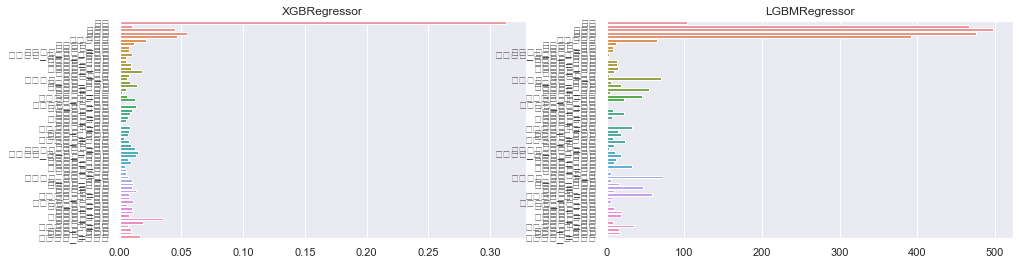

## train+test

In [ ]:
train_test=pd.concat([train, test], axis=0)

In [ ]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 49
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1255 non-null   datetime64[ns]
 1   요일              1255 non-null   object        
 2   본사정원수           1255 non-null   int64         
 3   본사휴가자수          1255 non-null   int64         
 4   본사출장자수          1255 non-null   int64         
 5   본사시간외근무명령서승인건수  1255 non-null   int64         
 6   현본사소속재택근무자수     1255 non-null   float64       
 7   조식메뉴            1255 non-null   object        
 8   중식메뉴            1255 non-null   object        
 9   석식메뉴            1255 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 127.5+ KB


# 1차 가공

## 석식계 0인 날

In [ ]:
train[train['석식계']==0]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0


In [ ]:
train[train['석식계']==0]['석식메뉴'].unique()

array(['    *        ', '     *       ', '      자기계발의날      ',
       '      *자기계발의날*      ', '      가정의날      ',
       '쌀밥/잡곡밥 (쌀:국내산) 된장찌개  미니함박조림  계란말이  비름나물  포기김치 (김치:국내산) ',
       '쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국  고추잡채*꽃빵  계란찜  오이무침  포기김치 (김치:국내산) ',
       '      *      ', '            ', '    자기계발의날        ',
       '    자기개발의날        ', '    *  자기계발의날  *    ',
       '    *  자기개발의날  *    ', '   *  자기개발의날  *     ',
       ' ＜자기 계발의 날＞      '], dtype=object)

In [ ]:
for uni in train[train['석식계']==0]['석식메뉴'].unique():
    for val in test['석식메뉴']:
        if uni in val:
            print(uni)

In [ ]:
test['석식메뉴'].unique()

array(['흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치 ',
       '충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지 ',
       '흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치 ',
       '흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치 ',
       '흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치 ',
       '오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치 ',
       '흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치 ',
       '유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치 ',
       '흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치 ',
       '흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지 ',
       '흑미밥 참치김치찌개 오징어굴소스볶음 차돌비빔국수 건새우무나물 포기김치 ',
       '흑미밥 순두부백탕 수제치킨까스 쫄면채소무침 얼갈이나물 포기김치 ',
       '흑미밥 손수제비국 쇠고기낙지볶음 카레홍합찜 쑥갓나물 포기김치 ',
       '곤드레밥 황태국 찰떡떡갈비조림 계란후라이 재래김*달래양념장 무생채 ',
       '흑미밥 바지락된장찌개 제육볶음 양배추숙*쌈장 노가리고추조림 겉절이김치 ',
       '흑미밥 버섯들깨탕 아귀콩나물찜 콤비네이션피자 돌나물&된장소스 포기김치 ',
       '흑미밥 동태알탕 깐풍육 고사리볶음 오이무침 포기김치 ',
       '흑미밥 쇠고기무국 춘전닭갈비 뉴욕핫도그 유채나물된장무침 포기김치 ',
       '애플카레라이스 팽이장국 가지탕수 소떡소떡 오복지무침 포기김치 ',
       '흑미밥 계란파국 쭈꾸미불고기 모둠채소전*장 씨앗콩자반 포기김치 ',
       '흑미밥 스팸김치찌개 삼치구이*와사비장 브로콜리깨소스무침 연근

## 메뉴 나누기
ref: https://dacon.io/competitions/official/235743/codeshare/2974?page=2&dtype=recent

In [ ]:
# Menu-extracting function
def extractMenu(array, keywords=[], not_in_keywords={}, comm_not_in=[]):
    extractedMenu = []
    for menu_nm in array:
        for kw in keywords:
            if menu_nm.find(kw) > -1:
                has_not_in = False
                if kw in not_in_keywords:
                    for sub_kw in not_in_keywords[kw]:
                        if menu_nm.find(sub_kw) > -1:
                            has_not_in = True
                            break
                for sub_kw in comm_not_in:
                    if menu_nm.find(sub_kw) > -1:
                        has_not_in = True
                        break

                if not has_not_in:
                    extractedMenu.append(menu_nm)
                    break
    return(extractedMenu)

def extractMenu2(array, keywords=[]):
    extractedMenu = []
    for menu_nm in tot_menu_arr:
        for kw in keywords:
            if menu_nm.find(kw) > -1:
                menu_nm_list = re.split(r'[^\w]', menu_nm)
                for menu_nm_tmp in menu_nm_list:
                    if menu_nm_tmp.find(kw) + len(kw) == len(menu_nm_tmp): # 끝에 있으면
                        extractedMenu.append(menu_nm)
                break
    return(extractedMenu)

In [ ]:
lunch_menu_data = train_test['중식메뉴']
dinner_menu_data = train_test['석식메뉴']

In [ ]:
tot_menu_arr = []
pattern = r"\(.*\)"
for menu_data in [lunch_menu_data, dinner_menu_data]:
    for daily_menu in menu_data:
        menu_list = daily_menu.strip().split()
        menu_list2 = []
        for i, menu_nm in enumerate(menu_list):
            menu_nm = re.sub(pattern, '', menu_nm)
            if menu_nm.strip() in ['', '*']:
                continue
            if menu_nm[0] == '(' or menu_nm[-1] == ')':
                continue
            menu_list2.append(menu_nm)
        tot_menu_arr += menu_list2

In [ ]:
tot_menu_arr = set(tot_menu_arr)

In [ ]:
len(tot_menu_arr)

2825

In [ ]:
# 육류 분류
# 소고기
# https://namu.wiki/w/%EC%87%A0%EA%B3%A0%EA%B8%B0
beef = ['소고기', '쇠고기', '불고기', '떡갈비', '갈비찜', '소갈비', '육사시미', '육회', '장조림', '와규', '야키니쿠', '규동', '스테이크', '햄버그 스테이크',
 '함박스테이크', '함바그스테이크', '함박 스테이크', '햄버거', '로스트 디너', '비프가스밀라네사', '웰링턴', '슈하스쿠', '아사도', '우육면',
 '육개장', '육포', '평양냉면', '비프 스트로가노프', '설렁탕', '소고기국', '소머리국밥', '곰탕', '너비아니', '보르챠', '소꼬리']
# 돼지고기
# https://namu.wiki/w/%EB%8F%BC%EC%A7%80%EA%B3%A0%EA%B8%B0
pig = ['돼지', '돼지머리', '머릿고기', '뒷고기', '관자살', '콧등살', '삼각살', '설중살', '설하살', '안중살', '뽈항정살',
 '볼살', '두항정', '돼지코', '항정살', '목살', '가브리살', '갈비', '앞다리살', '갈매기살', '등심', '안심',
 '삼겹살', '오겹살', '뒷다리살', '돈족', '내장', '오소리감투', '허파', '염통', '콩팥', '새끼보', '돈낭',
 '돈족', '돼지꼬리', '사태', '막창', '감자탕', '돈가스', '돼지갈비', '돼지국밥', '돼지불고기', '두루치기', '순대',
 '순댓', '족발', '보쌈', '수육', '편육', '제육', '탕수육', '삼겹', '맥적', '차슈', '향우구육', '꿔바로우', '훙사오러우',
 '회과육', '동파육', '라후테', '오향장육', '슈바인스학세', '소시지', '소세지', '포크 커틀릿', '함바그 스테이크', '함바그스테이크',
 '함박스테이크', '살스테이크','살 스테이크', '함박 스테이크', '베이컨', '햄', '스팸', '폭립', '폭찹', '돈지루', '부타동', '바쿠테', '팟 카파오 무 쌉', '비엔나', '소떡', '육']
# 닭고기
# https://namu.wiki/w/%EB%8B%AD%EA%B3%A0%EA%B8%B0
chicken = ['닭', '깐풍기', '꼬꼬면', '궁보계정', '간장닭', '기스면', '계', '도빙무시', '라조기', '백숙', '영계백숙',
 '불닭', '삼계탕', '삼계선', '오니시메', '옻닭', '연팔기', '유린기', '육회', '좌종당계', '찜닭', '초계밀면',
 '치킨', '도리텐', '지파이', '치짜', '취계', '카라아게', '가라아', '파닭', '양파닭', '케밥', '코코뱅', '탕수기',
 '포계', '프랑구 아사두']
# 양고기
# https://namu.wiki/w/%EC%96%91%EA%B3%A0%EA%B8%B0
sheep = ['양고기','훠궈', '양꼬치', '케밥', '샤슬릭', '징기스칸', '셰퍼드 파이', '허르헉', '양갈비']
# 오리고기
# https://namu.wiki/w/%EC%98%A4%EB%A6%AC%EA%B3%A0%EA%B8%B0
dug = ['오리']

web_keywords = beef + pig + chicken + sheep + dug
keywords = ['돈까스', '히레카츠', '히레까쓰', '히레가스', '포크', '부대찌개', '뒷다리', '앞다리', '돈', '순살',
                '소머리', '등뼈', '곱창', '도가니', '뼈해장국', '뼈다귀해장국', '목심', '채끝', '우둔', '양지', '설도', '만두', '만둣',
                '잡채', '류산슬', '유산슬', '고기', '고깃']
keywords += web_keywords

not_in_keywords = {'오리':['아오리', '오리엔탈'], '계':['계란', '계발', '계피'], '장조림':['계란', '메추리알'], '치킨':['치킨무'], '돈':['돈나물'], '만두':['당면계란'], '만둣':['당면계란']}
meat_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=[])

In [ ]:
# 돼지고기
keywords = ['돼지', '돼지머리', '머릿고기', '뒷고기', '관자살', '콧등살', '삼각살', '설중살', '설하살', '안중살', '뽈항정살',
 '볼살', '두항정', '돼지코', '항정살', '목살', '가브리살', '앞다리살', '갈매기살', '등심', '안심',
 '삼겹살', '오겹살', '앞다리살', '뒷다리살', '돈족', '내장', '오소리감투', '허파', '염통', '콩팥', '새끼보', '돈낭',
 '돈족', '돼지꼬리', '사태', '막창', '감자탕', '돈가스', '돼지갈비', '돼지국밥', '돼지불고기', '두루치기', '순대',
 '순댓', '족발', '보쌈', '수육', '편육', '제육', '탕수육', '삼겹', '맥적', '차슈', '향우구육', '꿔바로우', '훙사오러우',
 '회과육', '동파육', '라후테', '오향장육', '슈바인스학세', '소시지', '소세지', '포크 커틀릿',
 '목살스테이크','목살 스테이크', '베이컨', '햄', '스팸', '폭립', '폭찹', '돈지루', '부타동', '바쿠테', '팟 카파오 무 쌉', '비엔나', '소떡',
 '돈까스', '히레카츠', '히레까쓰', '히레가스', '포크', '돈', '등뼈', '뼈해장국', '뼈다귀해장국']
not_in_keywords = {'돈':['돈나물'], '만두':['당면계란'], '만둣':['당면계란']}
pig_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=[])

In [ ]:
# 소고기
keywords = ['소고기', '쇠고기', '소불고기', '소갈비', '육사시미', '육회', '와규', '야키니쿠', '규동', '소곱창',
            '로스트 디너', '비프가스밀라네사', '웰링턴', '슈하스쿠', '아사도', '우육면',
            '육개장', '육포', '평양냉면', '비프 스트로가노프', '설렁탕', '소고기국', '소머리국밥', '곰탕', '너비아니', '보르챠', '소꼬리', '소머리', '설도', '목심', '채끝', '우둔', '양지', '도가니']
beef_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords={}, comm_not_in=[])

In [ ]:
# 닭고기
keywords = ['닭', '깐풍기', '꼬꼬면', '궁보계정', '간장닭', '기스면', '계', '도빙무시', '라조기', '백숙', '영계백숙',
          '불닭', '삼계탕', '삼계선', '오니시메', '옻닭', '연팔기', '유린기', '육회', '좌종당계', '찜닭', '초계밀면',
          '치킨', '도리텐', '지파이', '치짜', '취계', '카라아게', '가라아', '파닭', '양파닭', '케밥', '코코뱅', '탕수기',
          '포계', '프랑구 아사두']
not_in_keywords = {'계':['계란', '계발', '계피'], '치킨':['치킨무']}

chicken_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=[])

In [ ]:
# 양고기 - 데이터 없어서 제외
keywords = ['양고기','훠궈', '양꼬치', '케밥', '샤슬릭', '징기스칸', '셰퍼드 파이', '허르헉', '양갈비']
sheep_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords={}, comm_not_in=[])
sheep_menus

[]

In [ ]:
# 오리고기
keywords = ['오리']
not_in_keywords = {'오리':['아오리', '오리엔탈']}
duck_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=[])

In [ ]:
#난류 (계란)
keywords = ['계란', '난', '란', '메추리알', '날치알', '동태알']
not_in_keywords = {"란":['토란'], '난':['커리', '카레']}
egg_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=[])

In [ ]:
# 죽류
keywords = ['죽', '누룽지']
juk_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords={}, comm_not_in=[])

In [ ]:
# 덮밥 및 국밥류
keywords = ['덮밥', '국밥']
gukbob_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords={}, comm_not_in=[])

In [ ]:
# 비빔밥 및 볶음밥류
keywords = ['비빔밥', '볶음밥']
bb_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords={}, comm_not_in=[])

In [ ]:
# 국탕류
keywords = ['국', '탕', '찌개', '국물']
soup_menus = extractMenu2(tot_menu_arr, keywords=keywords)

In [ ]:
# 구이류
keywords = ['구이']
gui_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords={}, comm_not_in=[])

In [ ]:
# 전류
keywords = ['전', '부침개', '빈대떡']
jeon_menus = extractMenu2(tot_menu_arr, keywords=keywords)

In [ ]:
# http://yaksik.net/detail.php?number=24904
# 튀김류
keywords = ['튀김', '까스', '카츠', '가츠', '까츠', '탕수', '덴뿌라', '덴푸라', '크로켓', '고로케', '맛탕', '치킨', '통닭', '부각', '강정', '김말이', '깐풍']
fry_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords={}, comm_not_in=[])

In [ ]:
# 곡물
keywords = ['현미', '밥', '쌀', '보리', '죽', '참깨', '들깨', '수수', '잡곡', '귀리', '퀴노아', '아마란스', '옥수수', '기장', '메밀', '모밀']
grain_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords={}, comm_not_in=[])

In [ ]:
# 콩류
keywords = ['콩', '녹두', '팥', '완두']
not_in_keywords = {'콩':['콩나물']}
bean_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=[])


In [ ]:
# 묵
keywords = ['묵']
not_in_keywords = {'묵':['어묵', '묵은지']}
kor_jelly_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=[])

In [ ]:
# 생선 및 조개류
# https://ko.wikipedia.org/wiki/%EC%83%9D%EC%84%A0
# https://namu.wiki/w/%EC%83%9D%EC%84%A0
# https://namu.wiki/w/%EC%A1%B0%EA%B0%9C
keywords = ['생선', '조개', '메기', '송어', '오징어', '굴', '멸치', '숭어', '성게', '고등어', '명태',
            '쏨뱅이', '연어', '틸라피아', '우럭', '이리치', '가재', '참바리', '상어', '돔',
            '삼치', '방어', '참치', '새우', '문어', '홍어', '농어', '붉평치', '청상아리', '황새치',
            '다랑어', '비막치어', '장어', '녹새치', '숭어', '굴비', '조기', '갈치', '꽁치',
            '전어', '명태', '노가리', '황태', '은어', '가물치', '쏘가리', '붕어', '잉어', '모래마주', '가자미',
            '간재미', '가오리', '박대', '양미리', '과메기', '청어', '생태',
            '개복치', '광어', '넙치', '기름치', '까나리', '날치','놀래미'
            ,'능성어','달고기','대구','도다리','도루묵','도미','독가시치'
            ,'만새기','망상어','문절망둑','물메기','미꾸라지','민어','방어'
            ,'추어탕','배스','밴댕이','뱅어','벵에돔','병어','보리멸'
            ,'복어','볼락','부세','부시리','붕장어','블루길'
            ,'빙어','산천어','서대','시샤모','쏘가리','쏠배감펭','쏨뱅이'
            ,'아귀','아구','임연수','전갱이','전복치','점성어','정어리'
            ,'준치','쥐치','청새치','청어','향어','홍어','황새치','매운탕'
            ,'루테피스크','게맛살','물회','회덮밥','부야베스','북엇국','세꼬시','수르스트뢰밍','식해','어묵','오뎅'
            ,'쥐포','추어탕','피시 앤드 칩스','피쉬 앤드 칩스','피시앤드칩스','피쉬앤드칩스','피시앤칩스','피쉬앤칩스','해물'
            ,'가리비', '개오지', '꼬막','대칭이','바지락','백합','홍합','소라', '골뱅이', '고둥','재첩'
            ,'전복','플라티케라무스', '봉골레', '클램차우더']
not_in_keywords = {'굴':['굴소스'], '새우':['새우젓']}
fish_shell_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=[])

In [ ]:
# 채소류
# https://namu.wiki/w/%EC%B1%84%EC%86%8C?from=%EC%95%BC%EC%B1%84
keywords = ['가지', '갓', '감자', '고구마', '고사리', '고추', '페페론치노', '냉이', '근대', '깻잎', '차조기'
            , '당근', '더덕', '도라지', '동아', '딸기', '마', '마늘', '멜론', '무', '무청'
            , '바나나', '배추', '버섯', '부추', '브로콜리', '상추', '생강', '쇠비름', '나물'
            , '쑥', '시금치', '수박', '시호', '아스파라거스', '야콘', '양파', '여주', '연근', '열무', '오이'
            , '우엉', '인삼', '죽순', '청경채', '참외', '칡', '풋콩', '토란', '토마토', '쪽파', '대파', '파인애플'
            , '파프리카', '피망', '케일', '고수', '로즈마리', '루타바가', '바질', '박하', '산마늘', '셀러리'
            , '아티초크', '타임', '파슬리', '호박', '피클', '파채', '파김치', '채소', '야채']
not_in_keywords = {'무':['무침'], '마':'마카로니', '고추':['고추장']}
vegetable_menus =  extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=[])

In [ ]:
# 해조류
# https://namu.wiki/w/%EC%A1%B0%EB%A5%98(%EC%88%98%EC%A4%91%EC%83%9D%EB%AC%BC)?from=%ED%95%B4%EC%A1%B0%EB%A5%98
keywords = ['김', '우뭇가사리', '한천', '매생이', '파래', '바다포도', '해캄', '클로렐라', '청각', '마리모모스볼', '다시마', '미역', '감태', '톳']
not_in_keywords = {'김':['김치', '튀김', '김칫']}
sea_alg_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=[])

In [ ]:
# 발효된 콩 상품 -> 장류
# https://namu.wiki/w/%EC%9E%A5%EB%A5%98
keywords = ['된장', '간장', '쯔유', '노추', '미소', '고추장', '청국장', '담북장', '팥장', '두부장', '비지장', '어육장', '춘장', '마장', '낫토', '두반장', '해선장', '굴소스', '게장',
 '장조림', '양념장', '장국', '쌈장', '초장', '*장']
jang_menus  = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords={}, comm_not_in=[])

In [ ]:
# 김치
# https://namu.wiki/w/%EA%B9%80%EC%B9%98
keywords = ['김치', '깍두기', '석박지', '동치미', '겉절이', '묵은지', '소박이', '섞박지', '생채', '게국지', '김칫']
kimchi_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords={}, comm_not_in=[])

In [ ]:
# 만두
# https://namu.wiki/w/%EB%A7%8C%EB%91%90
keywords = ['만두', '춘권', '만쥬', '사모사', '만둣']
mandu_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords={}, comm_not_in=[])

In [ ]:
# 곡물 가루(밀가루, 쌀가루 등 전분)
# https://namu.wiki/w/%EB%B0%80%EA%B0%80%EB%A3%A8
# 미숫가루
keywords = ["면", "수제비", "전", "부침개", "빵", "춘권", "튀김", "과자", "국수", "메밀", "모밀", "피자", "전병", "떡", "어묵", "오뎅", "소시지", "소세지", "햄", "김밥", 
            "부대찌개", "스콘", "만두", "파이", "빈대떡", "케이크", "케익", "쿠키", "핫도그", "파스타", "치킨", "라자냐", "팟타이", "나쵸", "팝콘", '스파게티', '짬뽕']
not_in_keywords = {'치킨':['치킨무'], '전':['전주식'], '짬뽕':['고기', '찌개', '국']}
powder_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=[])

In [ ]:
# 과일
# https://namu.wiki/w/%EA%B3%BC%EC%9D%BC
# https://namu.wiki/w/%EC%88%98%EC%9E%85%20%EA%B3%BC%EC%9D%BC
keywords = ['구기자','매실','무화과','버찌','체리','복분자','복숭아','블랙베리','블루베리','딸기','살구','앵두','자두','포도'
            ,'감','다래','대추','머루','모과','무화과','배','사과','석류','으름','귤','유자','레드향','천혜향','한라봉'
            ,'과라나','구아바','구즈베리','토마토','나랑히야','노니','노팔','니파팜','두꾸','두리안','라임','람부탄'
            ,'레몬','애플','루비솔트부쉬','리치','여지','마랑','마룰라','마르멜로','마프랑','망고','블랙베리','아보카도'
            ,'아로니아','아사이베리','아사이 베리','양초열매','오렌지','올리브','용안','롱간','자몽','바나나','딸기','수박'
            ,'참외','멜론','메론','여주','파인애플','토마토','코코넛','크랜베리','타마린드','파파야','패션프루트','패션후르츠']
not_in_keywords = {'살구':['구이', '목살', '삼겹살', '가브리살', '갈비살', '항정살'], '감':['감자'], '배':['배추', '알배기', '소배기']}
comm_not_in = ['주스', '쥬스', '음료', 'D', '순']
fruit_menus = extractMenu(tot_menu_arr, keywords=keywords, not_in_keywords=not_in_keywords, comm_not_in=comm_not_in)

## 메뉴 추가 특성2

In [ ]:
# 쌀
# https://namu.wiki/w/%EA%B3%A1%EB%AC%BC

keywords = ['쌀', '잡곡', '오곡', '현미', '흑미', '귀리', '차조', '렌틸콩', '강낭콩', '병아리콩', '완두콩', '기장', '보리', '수수', '호밀'] 
not_in_keywords = {'쌀':['쌀국수', '찹쌀'], '기장':['장조림'], '수수':['옥수수', '부꾸미']} # 찹쌀은 밥 메뉴명에 쓰이지 않아 삭제
comm_not_in = ['스프']
rice_menus = extractMenu(tot_menu_arr, keywords, not_in_keywords, comm_not_in)


In [ ]:
# 김밥 및 초밥

keywords = ['김밥', '초밥'] 
not_in_keywords = {'김밥':['볶음밥']}
comm_not_in = []
gimbab_menus = extractMenu(tot_menu_arr, keywords, not_in_keywords, comm_not_in)

In [ ]:
# 소금, 식초 등에 절인 해산물
# 해산물이 들어있지 않은 절임류도 포함시킴

keywords = ['절임', '젓'] 
not_in_keywords = {}
comm_not_in = []
saused_menus = extractMenu(tot_menu_arr, keywords, not_in_keywords, comm_not_in)

In [ ]:
# 면류
# https://femiwiki.com/w/%EB%B6%84%EB%A5%98:%EC%A2%85%EB%A5%98/%EB%A9%B4%EC%9A%94%EB%A6%AC
keywords = ['국수', '면', '파스타', '스파게티', '짬뽕', '라면'] 
not_in_keywords = {'짬뽕':['고기', '찌개', '국']}
comm_not_in = []
noodle_menus = extractMenu(tot_menu_arr, keywords, not_in_keywords, comm_not_in)

In [ ]:
# 스튜 - 조림과 찌개의 중간단계
# https://namu.wiki/w/%EC%8A%A4%ED%8A%9C
keywords = ['스튜', '조림'] 
not_in_keywords = {}
comm_not_in = []
stew_menus = extractMenu(tot_menu_arr, keywords, not_in_keywords, comm_not_in)

In [ ]:
# 한국 전통 샐러드
keywords = ['나물', '무침'] 
not_in_keywords = {'나물':['콩나물', '밥']}
comm_not_in = []
namul_menus = extractMenu(tot_menu_arr, keywords, not_in_keywords, comm_not_in)

In [ ]:
# 피클
keywords = ['피클'] 
not_in_keywords = {}
comm_not_in = []
pickle_menus = extractMenu(tot_menu_arr, keywords, not_in_keywords, comm_not_in)

In [ ]:
# 샐러드
keywords = ['샐러드'] 
not_in_keywords = {}
comm_not_in = []
salad_menus = extractMenu(tot_menu_arr, keywords, not_in_keywords, comm_not_in)

In [ ]:
# 우유
# 우유가 들어간 식재료(크림, 요거트 등)종류로 변경
keywords = ['까르보나라', '크림', '요거트'] 
not_in_keywords = {}
comm_not_in = ['샐러드', 'D', '드레싱', '소스'] # 샐러드 드레싱, 디핑소스 제외
milk_menus = extractMenu(tot_menu_arr, keywords, not_in_keywords, comm_not_in)

In [ ]:
# 빵, 쿠키
# https://ko.wikipedia.org/wiki/%EB%B9%B5_%EB%AA%A9%EB%A1%9D
keywords = ['와플', '케이크', '케잌', '바게트', '도넛', '도너츠', '핫도그', '도라야키', '베이글', '번', '비스킷', '스콘', '토스트', '브레드', '포카차', '피자', '호두과자', '쿠키'] 
not_in_keywords = {}
comm_not_in = []
bread_menus = extractMenu(tot_menu_arr, keywords, not_in_keywords, comm_not_in)

In [ ]:
# 음료
# https://ko.wikipedia.org/wiki/%EB%B9%B5_%EB%AA%A9%EB%A1%9D
keywords = ['주스', '쥬스', '수정과', '식혜', '식초', '코코아', '칵테일', '스무디', '우유', '셰이크', '야쿠르트', '요구르트', '커피', '차', '탄산수', '음료'] 
not_in_keywords = {'차':['차돌']}
comm_not_in = []
drink_menus = extractMenu(tot_menu_arr, keywords, not_in_keywords, comm_not_in)

In [ ]:
def get_food_one_hot(x, menu_array):
    menu_list = x.strip().split()
    for i, menu_nm in enumerate(menu_list):
        menu_nm = re.sub(pattern, '', menu_nm)
        if menu_nm.strip() in ['', '*']:
            continue
        if menu_nm[0] == '(' or menu_nm[-1] == ')':
            continue
        try:
            if menu_array.index(menu_nm) > -1:
                return 1
        except Exception:
            pass
    return 0

In [ ]:
# 데이터 병합
menu_col_nm = ['육류', '난류', '죽류', '덮밥_국밥류', '비빔밥_볶음밥류', '국탕류', '구이류', '전류', '튀김류', '곡물', '콩류',
               '묵', '생선_조개류', '채소류', '해조류', '장류', '김치', '만두', '곡물가루', '과일', '쌀', '김밥_초밥', '절임류',
               '면류', '스튜', '나물_무침류', '피클', '샐러드', '우유', '빵류', '음료', '돼지고기', '소고기', '닭고기', '오리고기']
menu_data_arr = [meat_menus, egg_menus, juk_menus, gukbob_menus, bb_menus, soup_menus, gui_menus, jeon_menus, fry_menus, grain_menus, bean_menus,
                 kor_jelly_menus, fish_shell_menus, vegetable_menus, sea_alg_menus, jang_menus, kimchi_menus, mandu_menus, powder_menus, fruit_menus, rice_menus, gimbab_menus, saused_menus,
                 noodle_menus, stew_menus, namul_menus, pickle_menus, salad_menus, milk_menus, bread_menus, drink_menus, pig_menus, beef_menus, chicken_menus, duck_menus]

for col_type in ['중식메뉴', '석식메뉴']:
    for i, menu_arr in enumerate(menu_data_arr):
        train[col_type + '_' + menu_col_nm[i]] = train[col_type].apply(lambda x: get_food_one_hot(x, menu_arr))
        test[col_type + '_' + menu_col_nm[i]] = train[col_type].apply(lambda x: get_food_one_hot(x, menu_arr))

In [ ]:
train_test = pd.concat([train, test], axis=0).reset_index(drop=True)
# train_test = train_test.fillna(0)
train_test.columns = ['일자', '요일', '정원', '휴가자', '출장자', '야근자', '재택근무자', '조식', '중식', '석식',\
              '중식계', '석식계', '중식메뉴_육류',
       '중식메뉴_난류', '중식메뉴_죽류', '중식메뉴_덮밥_국밥류', '중식메뉴_비빔밥_볶음밥류', '중식메뉴_국탕류',
       '중식메뉴_구이류', '중식메뉴_전류', '중식메뉴_튀김류', '중식메뉴_곡물', '중식메뉴_콩류', '중식메뉴_묵',
       '중식메뉴_생선_조개류', '중식메뉴_채소류', '중식메뉴_해조류', '중식메뉴_장류', '중식메뉴_김치', '중식메뉴_만두',
       '중식메뉴_곡물가루', '중식메뉴_과일', '중식메뉴_쌀', '중식메뉴_김밥_초밥', '중식메뉴_절임류', '중식메뉴_면류',
       '중식메뉴_스튜', '중식메뉴_나물_무침류', '중식메뉴_피클', '중식메뉴_샐러드', '중식메뉴_우유', '중식메뉴_빵류',
       '중식메뉴_음료', '중식메뉴_돼지고기', '중식메뉴_소고기', '중식메뉴_닭고기', '중식메뉴_오리고기', '석식메뉴_육류',
       '석식메뉴_난류', '석식메뉴_죽류', '석식메뉴_덮밥_국밥류', '석식메뉴_비빔밥_볶음밥류', '석식메뉴_국탕류',
       '석식메뉴_구이류', '석식메뉴_전류', '석식메뉴_튀김류', '석식메뉴_곡물', '석식메뉴_콩류', '석식메뉴_묵',
       '석식메뉴_생선_조개류', '석식메뉴_채소류', '석식메뉴_해조류', '석식메뉴_장류', '석식메뉴_김치', '석식메뉴_만두',
       '석식메뉴_곡물가루', '석식메뉴_과일', '석식메뉴_쌀', '석식메뉴_김밥_초밥', '석식메뉴_절임류', '석식메뉴_면류',
       '석식메뉴_스튜', '석식메뉴_나물_무침류', '석식메뉴_피클', '석식메뉴_샐러드', '석식메뉴_우유', '석식메뉴_빵류',
       '석식메뉴_음료', '석식메뉴_돼지고기', '석식메뉴_소고기', '석식메뉴_닭고기', '석식메뉴_오리고기']
train_test.drop(columns=['조식', '중식', '석식'], inplace=True)
# 중간 변수 색출
train_test = train_test.drop(columns=['중식메뉴_죽류', '중식메뉴_곡물', '중식메뉴_김치', '중식메뉴_쌀', '중식메뉴_나물_무침류', '중식메뉴_피클'
                        , '석식메뉴_죽류', '석식메뉴_곡물', '석식메뉴_김치', '석식메뉴_쌀', '석식메뉴_나물_무침류', '석식메뉴_피클',\
                      '중식메뉴_음료', '석식메뉴_음료'])

In [ ]:
train_test.head()

,일자,요일,정원,휴가자,출장자,야근자,재택근무자,중식계,석식계,중식메뉴_육류,...,석식메뉴_절임류,석식메뉴_면류,석식메뉴_스튜,석식메뉴_샐러드,석식메뉴_우유,석식메뉴_빵류,석식메뉴_돼지고기,석식메뉴_소고기,석식메뉴_닭고기,석식메뉴_오리고기
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,1,...,0,0,1,0,0,0,0,1,0,0
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,1,...,0,0,0,1,0,0,0,0,0,0
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,1,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   일자             1255 non-null   datetime64[ns]
 1   요일             1255 non-null   object        
 2   정원             1255 non-null   int64         
 3   휴가자            1255 non-null   int64         
 4   출장자            1255 non-null   int64         
 5   야근자            1255 non-null   int64         
 6   재택근무자          1255 non-null   float64       
 7   중식계            1205 non-null   float64       
 8   석식계            1205 non-null   float64       
 9   중식메뉴_육류        1255 non-null   int64         
 10  중식메뉴_난류        1255 non-null   int64         
 11  중식메뉴_덮밥_국밥류    1255 non-null   int64         
 12  중식메뉴_비빔밥_볶음밥류  1255 non-null   int64         
 13  중식메뉴_국탕류       1255 non-null   int64         
 14  중식메뉴_구이류       1255 non-null   int64         
 15  중식메뉴_전류        1255 n

<AxesSubplot:>

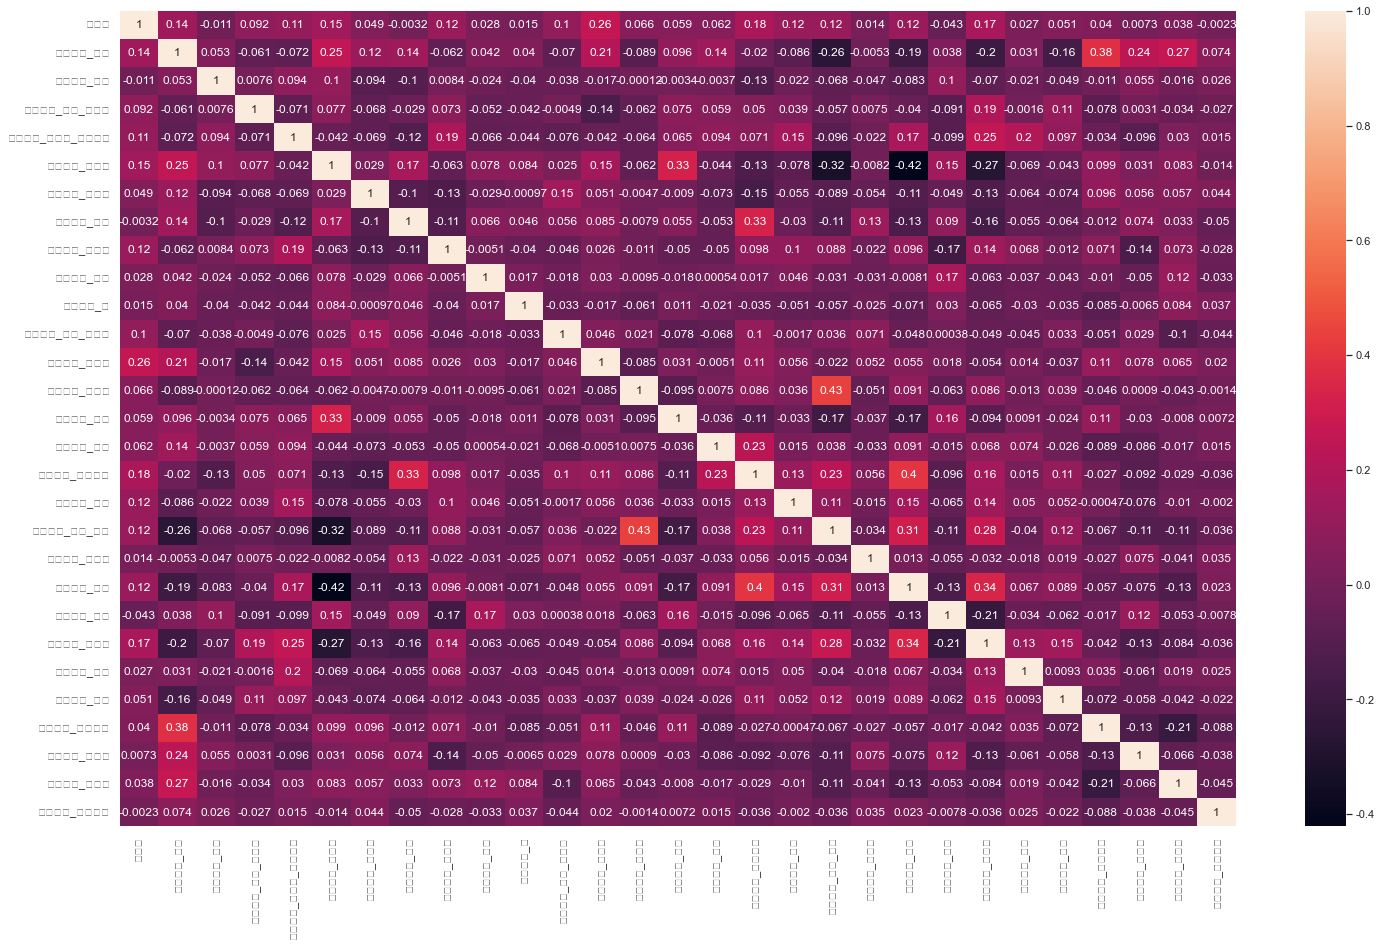

In [ ]:
# plt.rcParams['font.family']= 'Malgun Gothic'

plt.rc('font', family='Malgun Gothic')

sns.set(rc={'figure.figsize':(25, 15)}) # 결과 plot 크기 키워줌

col_list=[col for col in train_test.columns if ('석식' in col)]


sns.heatmap(train_test[col_list].corr(), annot=True)

## object -> int

In [ ]:
train_test['요일'].value_counts()

목    254
금    251
월    250
화    250
수    250
Name: 요일, dtype: int64

In [ ]:
# 요일 -> int
train_test['요일']=train_test['요일'].replace(['월', '화', '수', '목', '금'], [4,3,2,1,0])

# EDA

### 석식메뉴 자기계발의 날

In [ ]:
train['석식메뉴'].value_counts()

    *                                                                    19
                                                                          4
    자기계발의날                                                                3
    자기개발의날                                                                3
쌀밥/잡곡밥 (쌀:국내산) 감자국  닭데리야끼조림  매운어묵볶음  참나물땅콩가루무침  포기김치 (김치:국내산)             2
                                                                         ..
닭갈비볶음밥 (쌀:국내산) 가쯔오장국  크림카레우동  감자만두/샐러드 *흑임자드레싱 비트무생채  포기김치 (김치:국내산)       1
쌀밥/잡곡밥 (쌀:국내산) 콩나물김치국  가자미튀김  모듬소세지구이  가지나물  열무김치 (김치:국내산)                1
쌀밥/잡곡밥 (쌀:국내산) 옛날돈까스  브로컬리크림스프  키위드레싱샐러드  고구마범벅/무피클 음료 포기김치 (김치:국내산)      1
쌀밥/잡곡밥 (쌀:국내산) 부대찌개  해물청경채볶음  메밀전  청포묵무침  포기김치 (김치:국내산)                   1
(New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기                                 1
Name: 석식메뉴, Length: 1168, dtype: int64

In [ ]:
train[train['석식메뉴']==train['석식메뉴'].value_counts().index[0]]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,석식메뉴_나물_무침류,석식메뉴_피클,석식메뉴_샐러드,석식메뉴_우유,석식메뉴_빵류,석식메뉴_음료,석식메뉴_돼지고기,석식메뉴_소고기,석식메뉴_닭고기,석식메뉴_오리고기
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,...,0,0,0,0,0,0,0,0,0,0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,...,0,0,0,0,0,0,0,0,0,0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,...,0,0,0,0,0,0,0,0,0,0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,...,0,0,0,0,0,0,0,0,0,0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,...,0,0,0,0,0,0,0,0,0,0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,...,0,0,0,0,0,0,0,0,0,0
412,2017-09-29,금,2642,214,248,22,0.0,모닝롤/치즈프레즐 우유/주스 계란후라이 홍게살죽/쌀밥 (쌀:국내산) 김치두부국 ...,쌀밥/잡곡밥 (쌀:국내산) 미역국 쇠불고기/잡채 오징어숙회무침 미니케익/식혜 ...,*,...,0,0,0,0,0,0,0,0,0,0
424,2017-10-25,수,2645,75,289,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 동태탕 시래기조...,곤드레밥*강된장 (쌀:국내산) 가쯔오장국 갈치조림 쇠고기잡채 쑥갓두부무침 알...,*,...,0,0,0,0,0,0,0,0,0,0
449,2017-11-29,수,2644,78,261,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 차돌박이찌개 시금...,나물비빔밥 (쌀:국내산) 미소장국 코다리조림 과일샐러드 군고구마 깍두기 (김...,*,...,0,0,0,0,0,0,0,0,0,0
468,2017-12-27,수,2665,169,255,0,0.0,모닝롤/씨크립샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 북어콩나물국 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기미역국 오징어볶음 동그랑땡전 무쌈말이 포기김...,*,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train[train['석식메뉴']==train['석식메뉴'].value_counts().index[1]]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,석식메뉴_나물_무침류,석식메뉴_피클,석식메뉴_샐러드,석식메뉴_우유,석식메뉴_빵류,석식메뉴_음료,석식메뉴_돼지고기,석식메뉴_소고기,석식메뉴_닭고기,석식메뉴_오리고기
549,2018-04-25,수,2714,66,285,0,0.0,모닝롤/롤케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 아욱된장국 감자...,비빔밥 (쌀:국내산) 유부장국 오징어튀김 떡밤초 요플레 포기김치 (김치:국내산),,...,0,0,0,0,0,0,0,0,0,0
571,2018-05-30,수,2721,80,281,0,0.0,모닝롤/꿀호떡 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 맑은만두육개장 ...,콩나물밥 (쌀:국내산) 유부장국 수제돈가스 파스타샐러드 무생채 포기김치 (김...,,...,0,0,0,0,0,0,0,0,0,0
609,2018-07-25,수,2704,226,256,1,0.0,모닝롤/찐빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 새알만두국 애호박...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기샤브국 유린기 사각어묵볶음 오이사과생채 포기...,,...,0,0,0,0,0,0,0,0,0,0
648,2018-09-19,수,2763,77,288,0,0.0,모닝롤/오렌지빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 떡국 숙주나물...,카레덮밥 (쌀:국내산) 유부장국 감자프리타타 메밀전병만두 쨔샤이무침/과일 포...,,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train[train['석식메뉴']==train['석식메뉴'].value_counts().index[2]]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,석식메뉴_나물_무침류,석식메뉴_피클,석식메뉴_샐러드,석식메뉴_우유,석식메뉴_빵류,석식메뉴_음료,석식메뉴_돼지고기,석식메뉴_소고기,석식메뉴_닭고기,석식메뉴_오리고기
667,2018-10-31,수,2805,111,306,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 느...,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 수제돈가스 닭살겨자채 반달호박나물 포기김...,자기계발의날,...,0,0,0,0,0,0,0,0,0,0
706,2018-12-26,수,2846,184,241,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 김구이...,쌀밥/잡곡밥 (쌀:국내산) 아욱국 돈육굴소스볶음 골뱅이무침*소면 얼갈이나물 ...,자기계발의날,...,0,0,0,0,0,0,0,0,0,0
853,2019-07-31,수,2760,495,231,0,0.0,모닝롤/단호박찐빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 열무된장국 ...,곤드레밥*양념장 (쌀:국내산) 맑은국 해물누룽지탕 (오징어:원양산) 메밀전병만두 ...,자기계발의날,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train[train['석식메뉴']==train['석식메뉴'].value_counts().index[3]]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,석식메뉴_나물_무침류,석식메뉴_피클,석식메뉴_샐러드,석식메뉴_우유,석식메뉴_빵류,석식메뉴_음료,석식메뉴_돼지고기,석식메뉴_소고기,석식메뉴_닭고기,석식메뉴_오리고기
730,2019-01-30,수,2985,66,226,1,0.0,모닝롤/소보루빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 콩나물국 치커...,"카레덮밥 (쌀:국내산,돈육:국내산) 유부장국 새우까스*칠리소스 쫄면무침 오이무...",자기개발의날,...,0,0,0,0,0,0,0,0,0,0
973,2020-01-29,수,2821,101,214,4,0.0,모닝롤/야채샌드 우유/주스 스크램블에그 고구마죽/쌀밥 (쌀:국내산) 꽃게탕 미역...,"콩나물밥*양념장 (쌀:국내산,소고기:호주) 가쯔오장국 치킨핑거 (닭:국내산) 꽃맛...",자기개발의날,...,0,0,0,0,0,0,0,0,0,0
993,2020-02-26,수,2872,109,190,4,0.0,모닝롤/고구마파이 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 홍합탕 감자...,"낙지비빔밥 (쌀:국내,낙지:중국산) 팽이장국 치킨텐더*콘소스D (닭:국내산) 과일...",자기개발의날,...,0,0,0,0,0,0,0,0,0,0


#### 이 날 석식 먹는 사람 수 == 0
<pre>
    *                                                                    19
                                                                          4
    자기계발의날                                                                3
    자기개발의날                                                                3
    ... 말고도 더 있다.


### 잔반없는 날처럼 요일 별로 다를지도

In [ ]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '중식메뉴_육류',
       '중식메뉴_난류', '중식메뉴_죽류', '중식메뉴_덮밥_국밥류', '중식메뉴_비빔밥_볶음밥류', '중식메뉴_국탕류',
       '중식메뉴_구이류', '중식메뉴_전류', '중식메뉴_튀김류', '중식메뉴_곡물', '중식메뉴_콩류', '중식메뉴_묵',
       '중식메뉴_생선_조개류', '중식메뉴_채소류', '중식메뉴_해조류', '중식메뉴_장류', '중식메뉴_김치', '중식메뉴_만두',
       '중식메뉴_곡물가루', '중식메뉴_과일', '중식메뉴_쌀', '중식메뉴_김밥_초밥', '중식메뉴_절임류', '중식메뉴_면류',
       '중식메뉴_스튜', '중식메뉴_나물_무침류', '중식메뉴_피클', '중식메뉴_샐러드', '중식메뉴_우유', '중식메뉴_빵류',
       '중식메뉴_음료', '중식메뉴_돼지고기', '중식메뉴_소고기', '중식메뉴_닭고기', '중식메뉴_오리고기', '석식메뉴_육류',
       '석식메뉴_난류', '석식메뉴_죽류', '석식메뉴_덮밥_국밥류', '석식메뉴_비빔밥_볶음밥류', '석식메뉴_국탕류',
       '석식메뉴_구이류', '석식메뉴_전류', '석식메뉴_튀김류', '석식메뉴_곡물', '석식메뉴_콩류', '석식메뉴_묵',
       '석식메뉴_생선_조개류', '석식메뉴_채소류', '석식메뉴_해조류', '석식메뉴_장류', '석식메뉴_김치', '석식메뉴_만두',
       '석식메뉴_곡물가루', '석식메뉴_과일', '석식메뉴_쌀', '석식메뉴_김밥_초밥', '석식메뉴_절임류', '석식메뉴_면류',
       '석식메뉴_스튜', '석식메뉴_나물_무침류', '석식메뉴_피클', '석식메뉴_샐러드', '석식메뉴_우유', '석식메뉴_빵류',
       '석식메뉴_음료', '석

In [ ]:
train.groupby(by='요일')['중식계'].mean().sort_values(ascending=False)

요일
월    1144.331950
화     925.620833
수     905.213389
목     823.991803
금     653.609959
Name: 중식계, dtype: float64

In [ ]:
train.groupby(by='요일')['석식계'].mean().sort_values(ascending=False)

요일
월    538.933610
화    520.129167
목    480.401639
금    404.979253
수    363.615063
Name: 석식계, dtype: float64

## before 코로나, after 코로나

<AxesSubplot:xlabel='일자', ylabel='중식계'>

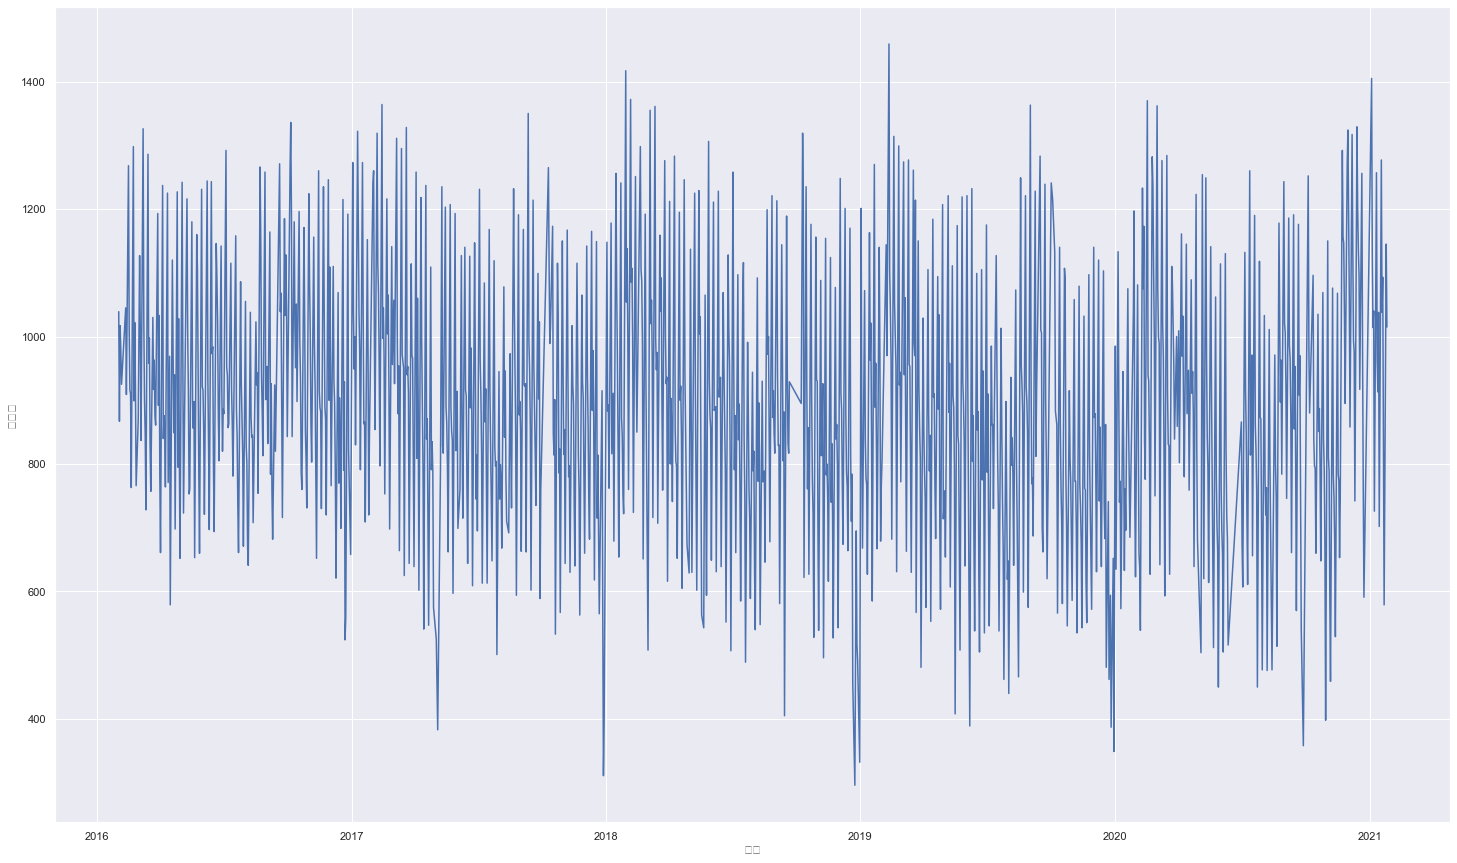

In [ ]:
sns.lineplot(y=train['중식계'], x=train['일자'])

<AxesSubplot:xlabel='일자', ylabel='석식계'>

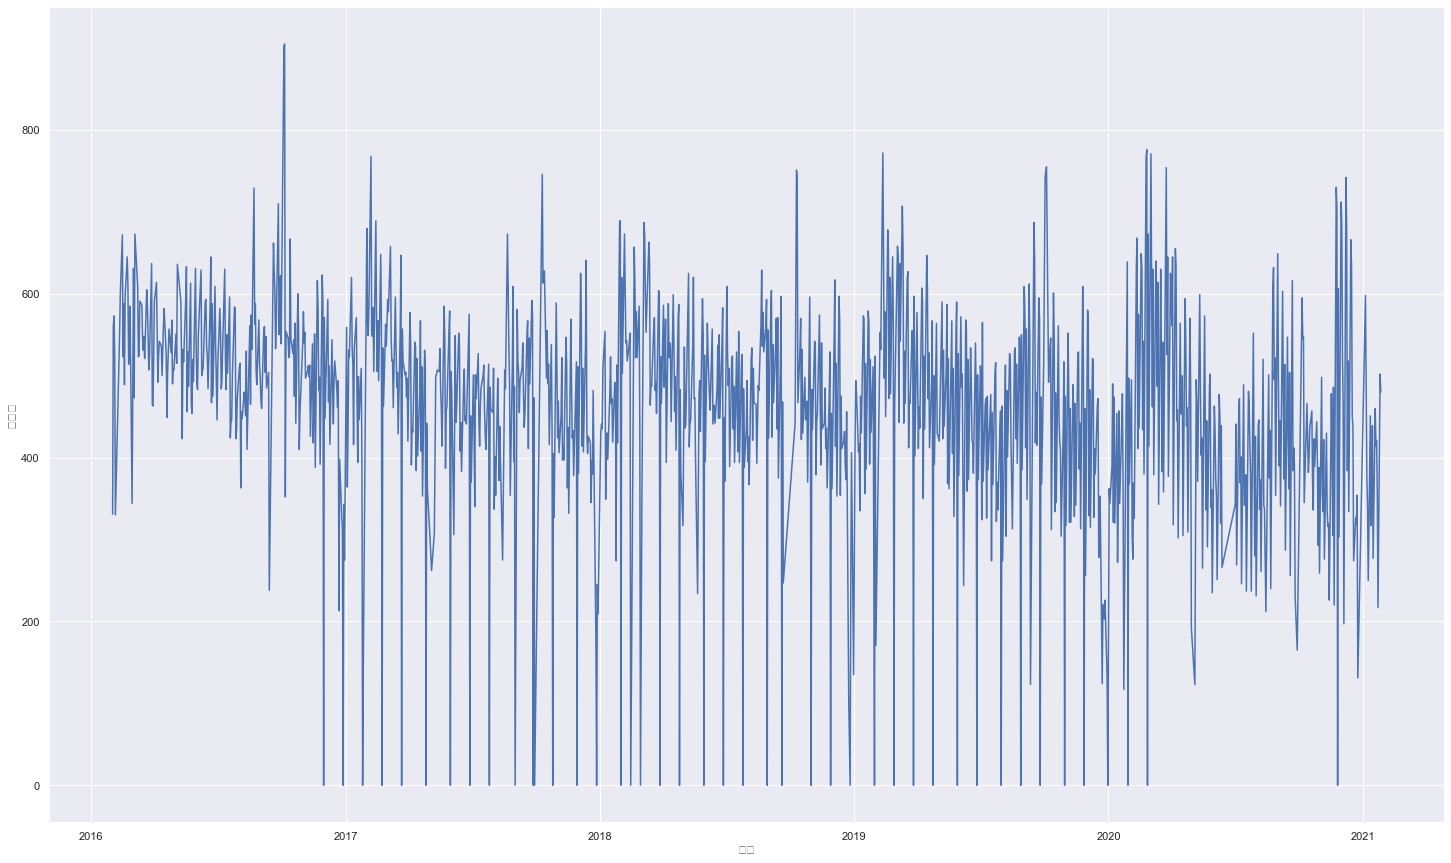

In [ ]:
sns.lineplot(y=train['석식계'], x=train['일자'])

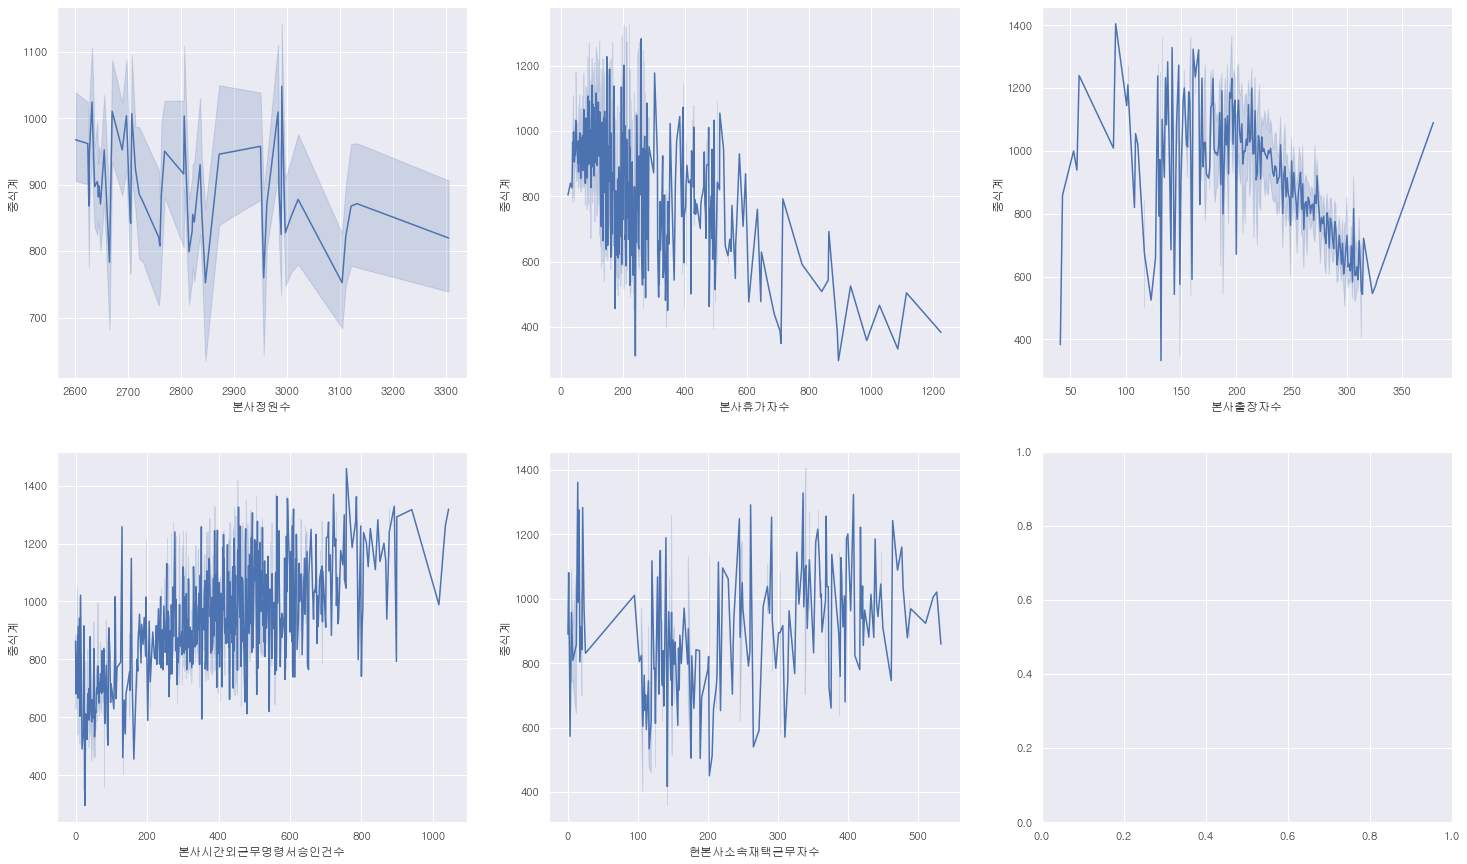

In [ ]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

col_list=train.columns[2:7]
f, axs=plt.subplots(2,3)

for a, col in enumerate(col_list):
    i=a//3
    j=a%3
    sns.lineplot(x=train[col], y=train['중식계'], ax=axs[i,j])
    
#             본사정원수	본사휴가자수	본사출장자수

# 본사시간외근무명령서승인건수	현본사소속재택근무자수	

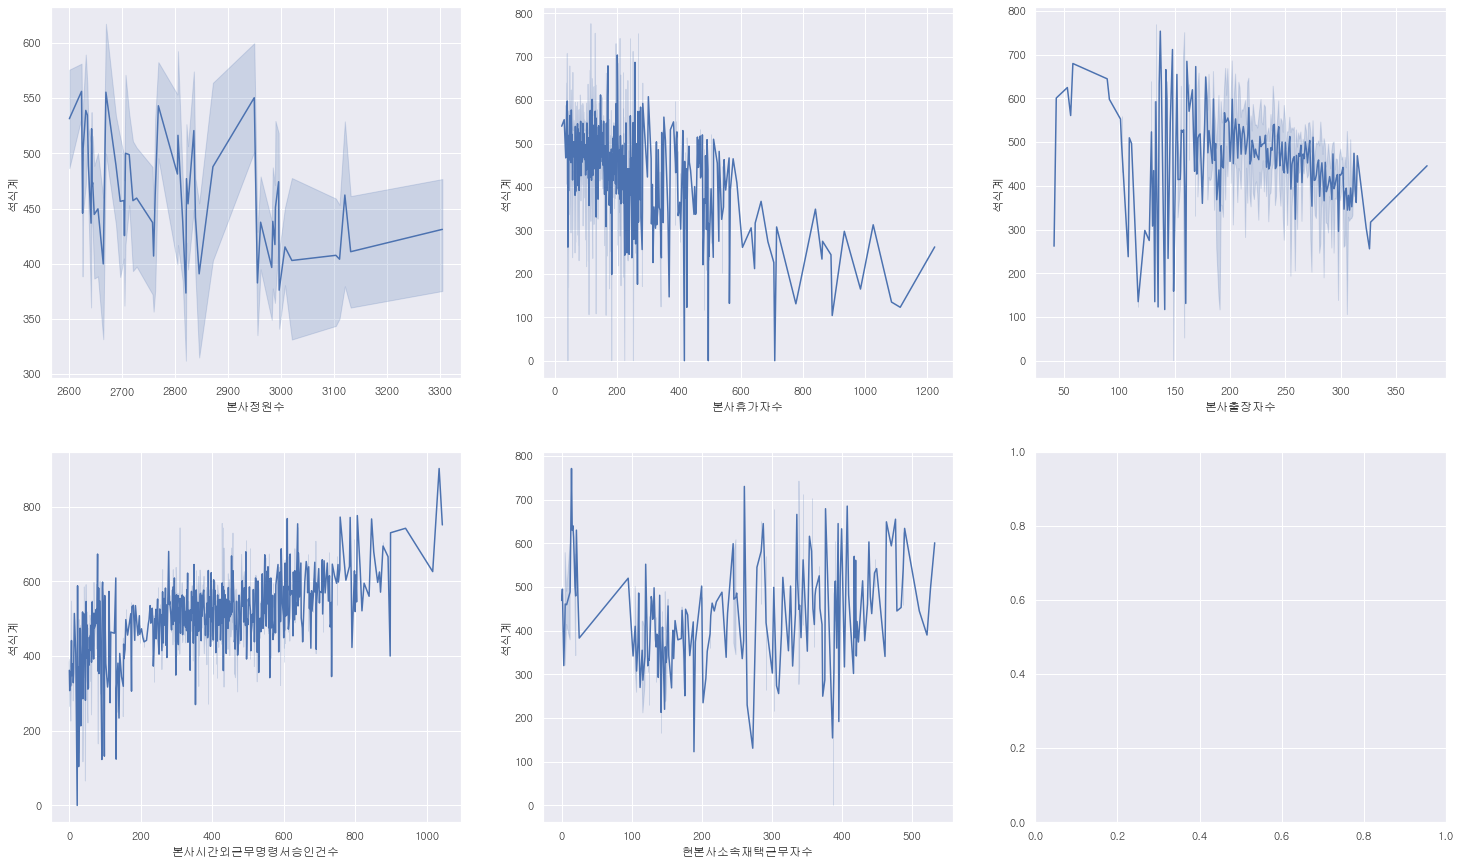

In [ ]:
# from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

col_list=train.columns[2:7]
f, axs=plt.subplots(2,3)

for a, col in enumerate(col_list):
    i=a//3
    j=a%3
    sns.lineplot(x=train[col], y=train['석식계'], ax=axs[i,j])
    
# 본사정원수	본사휴가자수	본사출장자수

# 본사시간외근무명령서승인건수	현본사소속재택근무자수	

# 일단 제출

In [ ]:
train_test

,일자,요일,정원,휴가자,출장자,야근자,재택근무자,중식계,석식계,중식메뉴_육류,...,석식메뉴_절임류,석식메뉴_면류,석식메뉴_스튜,석식메뉴_샐러드,석식메뉴_우유,석식메뉴_빵류,석식메뉴_돼지고기,석식메뉴_소고기,석식메뉴_닭고기,석식메뉴_오리고기
0,2016-02-01,4,2601,50,150,238,0.0,1039.0,331.0,1,...,0,0,1,0,0,0,0,1,0,0
1,2016-02-02,3,2601,50,173,319,0.0,867.0,560.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016-02-03,2,2601,56,180,111,0.0,1017.0,573.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-02-04,1,2601,104,220,355,0.0,978.0,525.0,1,...,0,0,0,1,0,0,0,0,0,0
4,2016-02-05,0,2601,278,181,34,0.0,925.0,330.0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2021-04-05,4,2973,125,174,704,331.0,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
1251,2021-04-06,3,2973,76,170,636,364.0,NaN,NaN,1,...,0,0,0,0,0,0,0,1,0,0
1252,2021-04-07,2,2973,96,214,1,334.0,NaN,NaN,1,...,0,0,0,0,0,0,0,0,1,0
1253,2021-04-08,1,2973,105,238,509,324.0,NaN,NaN,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
train_test=train_test.set_index('일자')

In [ ]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2016-02-01 to 2021-04-09
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   요일             1255 non-null   int64  
 1   정원             1255 non-null   int64  
 2   휴가자            1255 non-null   int64  
 3   출장자            1255 non-null   int64  
 4   야근자            1255 non-null   int64  
 5   재택근무자          1255 non-null   float64
 6   중식계            1205 non-null   float64
 7   석식계            1205 non-null   float64
 8   중식메뉴_육류        1255 non-null   int64  
 9   중식메뉴_난류        1255 non-null   int64  
 10  중식메뉴_덮밥_국밥류    1255 non-null   int64  
 11  중식메뉴_비빔밥_볶음밥류  1255 non-null   int64  
 12  중식메뉴_국탕류       1255 non-null   int64  
 13  중식메뉴_구이류       1255 non-null   int64  
 14  중식메뉴_전류        1255 non-null   int64  
 15  중식메뉴_튀김류       1255 non-null   int64  
 16  중식메뉴_콩류        1255 non-null   int64  
 17  중식메뉴_묵         1255 non-null   int

In [ ]:
# reg_fit_score(train_test, '중식계')

In [ ]:
# tree_fit_score(train_test, '중식계')/

In [ ]:
# sco_df=fit_score(train_test,'중식계', '가공전', DF=True)
# sco_df.head()

In [ ]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,석식메뉴_나물_무침류,석식메뉴_피클,석식메뉴_샐러드,석식메뉴_우유,석식메뉴_빵류,석식메뉴_음료,석식메뉴_돼지고기,석식메뉴_소고기,석식메뉴_닭고기,석식메뉴_오리고기
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,...,1,0,0,0,0,0,0,1,0,0
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,...,1,0,0,0,0,0,0,0,0,0
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,...,0,1,1,0,0,0,0,0,0,0
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,...,1,0,0,0,0,0,1,0,1,0


In [ ]:
train, test=my_split(train_test)
model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

#----------------------------------------------- 하단 코드 동일
y = train['중식계']
X = train.drop(['중식계','석식계'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model= LGBMRegressor()
for model in model_list:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)
    print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


#------------------------------------------------- 공모전 제출용 학습
test_pred = model.predict(test)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(sub['중식계'].min(), sub['중식계'].max())
print(test.index.values.min()   , test.index.values.max())
sub.head(1)
#------------------------------------------------- 답안지 작성
sub['중식계'] = test_pred.reshape(-1,1)
print(sub.head(2))
sub.to_csv("v01.csv", index=False)    


 MAE:83.2732 LinearRegression
 MAE:81.8384 Lasso
 MAE:85.1980 ElasticNet
 MAE:83.1293 Ridge
 MAE:73.0135 XGBRegressor
 MAE:73.3052 LGBMRegressor
50 [1021  949  588 1195  956  933  881  599 1169 1002  710 1303 1081  970
  857  584 1205 1028  775  764  506 1108  903  871  576 1246 1061 1018
  905  610 1280 1033  975  920  560 1192  938  809  732  483 1199 1010
  855  732  500 1171 1058  887  816  559]
0 0
2021-01-27T00:00:00.000000000 2021-04-09T00:00:00.000000000
           일자   중식계  석식계
0  2021-01-27  1021    0
1  2021-01-28   949    0


In [ ]:
train, test=my_split(train_test)
model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

#----------------------------------------------- 하단 코드 동일
y = train['석식계']
X = train.drop(['중식계','석식계'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model= LGBMRegressor()
for model in model_list:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)
    print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


#------------------------------------------------- 공모전 제출용 학습
test_pred = model.predict(test)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(sub['석식계'].min(), sub['석식계'].max())
print(test.index.values.min()   , test.index.values.max())
sub.head(1)
#------------------------------------------------- 답안지 작성
sub['석식계'] = test_pred.reshape(-1,1)
print(sub.head(2))
sub.to_csv("v01.csv", index=False)    


 MAE:70.2300 LinearRegression
 MAE:68.5731 Lasso
 MAE:65.8698 ElasticNet
 MAE:70.0279 Ridge
 MAE:55.5036 XGBRegressor
 MAE:54.2350 LGBMRegressor
50 [340 468 275 574 425 421 470 413 566 481 254 745 611 398 466 397 647 610
 377 437 281 634 356 512 387 615 609 374 493 300 688 563 377 457 291 603
 581 395 437  69 607 515 382 405  95 602 554 401 453 254]
0 0
2021-01-27T00:00:00.000000000 2021-04-09T00:00:00.000000000
           일자   중식계  석식계
0  2021-01-27  1021  340
1  2021-01-28   949  468


## train_test

# 가공

## 또다른 석식계 0인 날 -> drop (모델 성능에 영향 줄까봐)

In [ ]:
train_test=train_test[train_test['석식계']!=0]

In [ ]:
train.groupby(by='요일')['중식계'].mean().sort_values(ascending=False)

요일
4    1144.331950
3     925.620833
2     905.213389
1     823.991803
0     653.609959
Name: 중식계, dtype: float64

In [ ]:
train.groupby(by='요일')['석식계'].mean().sort_values(ascending=False)

요일
4    538.933610
3    520.129167
1    480.401639
0    404.979253
2    363.615063
Name: 석식계, dtype: float64

## 코로나

In [ ]:
train_test.head()

,요일,정원,휴가자,출장자,야근자,재택근무자,중식계,석식계,중식메뉴_육류,중식메뉴_난류,...,석식메뉴_절임류,석식메뉴_면류,석식메뉴_스튜,석식메뉴_샐러드,석식메뉴_우유,석식메뉴_빵류,석식메뉴_돼지고기,석식메뉴_소고기,석식메뉴_닭고기,석식메뉴_오리고기
일자,,,,,,,,,,,,,,,,,,,,,
2016-02-01,4,2601,50,150,238,0.0,1039.0,331.0,1,1,...,0,0,1,0,0,0,0,1,0,0
2016-02-02,3,2601,50,173,319,0.0,867.0,560.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-03,2,2601,56,180,111,0.0,1017.0,573.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-04,1,2601,104,220,355,0.0,978.0,525.0,1,0,...,0,0,0,1,0,0,0,0,0,0
2016-02-05,0,2601,278,181,34,0.0,925.0,330.0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
print(train_test[train_test['재택근무자']<=100]['석식계'].mean())
print(train_test[train_test['재택근무자']>=100]['석식계'].mean())

print(train_test[train_test['재택근무자']<=100]['중식계'].mean())
print(train_test[train_test['재택근무자']>=100]['중식계'].mean())

490.29824561403507
421.43523316062175
892.9927760577915
883.839378238342


In [ ]:
print(train_test.loc[:'2020-01-01','중식계'].mean())
print(train_test.loc['2020-02-01':,'중식계'].mean())

892.4541484716157
894.2466960352423


In [ ]:
print(train_test.loc[:'2020-01-01','석식계'].mean())
print(train_test.loc['2020-02-01':,'석식계'].mean())

491.02510917030565
436.9515418502203


<AxesSubplot:>

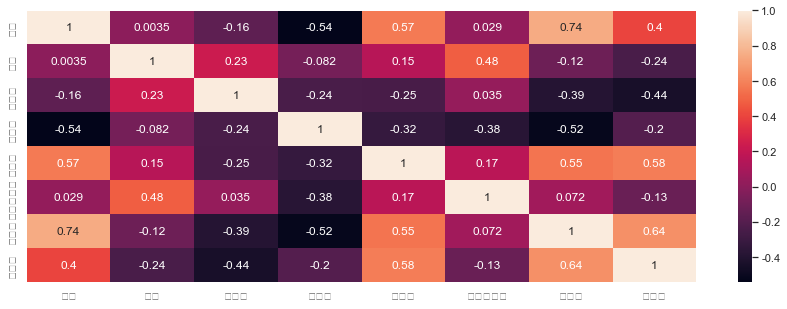

In [ ]:
# plt.rcParams['font.family']= 'Malgun Gothic'

plt.rc('font', family='Malgun Gothic')

sns.set(rc={'figure.figsize':(15, 5)}) # 결과 plot 크기 키워줌

col_list=[col for col in train_test.columns if ('메뉴' not in col)]


sns.heatmap(train_test[col_list].corr(), annot=True)

In [ ]:
col_list

['요일', '정원', '휴가자', '출장자', '야근자', '재택근무자', '중식계', '석식계']

In [ ]:
# train_test['현본사소속재택근무자수'].

In [ ]:
# min_max_scaler : 정원

# 일단 점수 보자(2차)

In [ ]:
train, test=my_split(train_test)
model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

#----------------------------------------------- 하단 코드 동일
y = train['중식계']
X = train.drop(['중식계','석식계'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model= LGBMRegressor()
for model in model_list:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)
    print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


#------------------------------------------------- 공모전 제출용 학습
test_pred = model.predict(test)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(sub['중식계'].min(), sub['중식계'].max())
print(test.index.values.min()   , test.index.values.max())
sub.head(1)
#------------------------------------------------- 답안지 작성
sub['중식계'] = test_pred.reshape(-1,1)
print(sub.head(2))
sub.to_csv("v02.csv", index=False)    


 MAE:84.8089 LinearRegression
 MAE:83.4780 Lasso
 MAE:87.9932 ElasticNet
 MAE:84.6836 Ridge
 MAE:73.2017 XGBRegressor
 MAE:71.5954 LGBMRegressor
50 [ 996  936  559 1212  974  956  939  602 1201  978  785 1241 1130 1039
  874  595 1223 1062  833  794  537 1082  928  910  605 1250 1063 1058
  958  662 1260 1045  950  880  583 1207  990  852  815  496 1205 1036
  883  804  544 1160 1003  932  870  558]
483 1303
2021-01-27T00:00:00.000000000 2021-04-09T00:00:00.000000000
           일자  중식계  석식계
0  2021-01-27  996  340
1  2021-01-28  936  468


In [ ]:
# 석식 train_test 재택근무자 없애기
# 점수 살짝 떨어짐
train_test_석=train_test.drop('재택근무자', axis=1)

In [ ]:
train, test=my_split(train_test)
model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

#----------------------------------------------- 하단 코드 동일
y = train['석식계']
X = train.drop(['중식계','석식계'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model= LGBMRegressor()
for model in model_list:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)
    print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


#------------------------------------------------- 공모전 제출용 학습
test_pred = model.predict(test)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(sub['석식계'].min(), sub['석식계'].max())
print(test.index.values.min()   , test.index.values.max())
sub.head(1)
#------------------------------------------------- 답안지 작성
sub['석식계'] = test_pred.reshape(-1,1)
print(sub.head(2))
sub.to_csv("v02.csv", index=False)    



 MAE:57.2076 LinearRegression
 MAE:54.8989 Lasso
 MAE:55.3486 ElasticNet
 MAE:57.1194 Ridge
 MAE:51.4703 XGBRegressor
 MAE:50.8207 LGBMRegressor
50 [399 438 261 570 411 421 484 364 588 481 242 732 622 418 463 361 644 617
 381 452 271 647 495 515 374 608 606 403 489 305 671 539 409 471 318 616
 544 365 418 233 602 477 431 417 254 629 525 412 463 257]
69 745
2021-01-27T00:00:00.000000000 2021-04-09T00:00:00.000000000
           일자  중식계  석식계
0  2021-01-27  996  399
1  2021-01-28  936  438


In [ ]:
train, test=my_split(train_test_석)
model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

#----------------------------------------------- 하단 코드 동일
y = train['석식계']
X = train.drop(['중식계','석식계'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model= LGBMRegressor()
for model in model_list:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)
    print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


#------------------------------------------------- 공모전 제출용 학습
test_pred = model.predict(test)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(sub['석식계'].min(), sub['석식계'].max())
print(test.index.values.min()   , test.index.values.max())
sub.head(1)
#------------------------------------------------- 답안지 작성
sub['석식계'] = test_pred.reshape(-1,1)
print(sub.head(2))
sub.to_csv("v02.csv", index=False)    


 MAE:57.0761 LinearRegression
 MAE:55.4430 Lasso
 MAE:57.2150 ElasticNet
 MAE:57.0266 Ridge
 MAE:52.4618 XGBRegressor
 MAE:51.8503 LGBMRegressor
50 [374 466 278 598 423 388 516 360 581 499 244 729 651 410 550 370 651 636
 409 530 323 642 486 562 403 631 628 383 480 307 644 555 393 494 324 596
 526 364 441 273 593 474 439 464 286 621 523 409 489 285]
244 729
2021-01-27T00:00:00.000000000 2021-04-09T00:00:00.000000000
           일자  중식계  석식계
0  2021-01-27  996  374
1  2021-01-28  936  466


## 재택근무자 100명 미만

### drop -> 취소

In [ ]:
# 재택근무자 100명 미만 0으로 두면??? or drop하면??
# 데이터 너무 적어짐
train_test2=train_test[train_test['재택근무자']>=100]

In [ ]:
train, test=my_split(train_test2)
model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

#----------------------------------------------- 하단 코드 동일
y = train['중식계']
X = train.drop(['중식계','석식계'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model= LGBMRegressor()
for model in model_list:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)
    print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


#------------------------------------------------- 공모전 제출용 학습
test_pred = model.predict(test)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(sub['중식계'].min(), sub['중식계'].max())
print(test.index.values.min()   , test.index.values.max())
sub.head(1)
#------------------------------------------------- 답안지 작성
sub['중식계'] = test_pred.reshape(-1,1)
print(sub.head(2))
# sub.to_csv("v02.csv", index=False)    


 MAE:110.1279 LinearRegression
 MAE:110.0462 Lasso
 MAE:126.4790 ElasticNet
 MAE:109.7556 Ridge
 MAE:91.0368 XGBRegressor
 MAE:84.0380 LGBMRegressor
50 [1050  941  651 1172  983  890  869  670 1159  945  663 1232 1003  969
  810  587 1137  946  833  775  491 1090  950  932  671 1171 1039  964
  948  634 1254 1059 1027  942  570 1265 1016  945  843  510 1218 1028
  905  859  568 1177 1066  992  917  518]
496 1260
2021-01-27T00:00:00.000000000 2021-04-09T00:00:00.000000000
           일자   중식계  석식계
0  2021-01-27  1050  399
1  2021-01-28   941  438


In [ ]:
train, test=my_split(train_test2)
model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

#----------------------------------------------- 하단 코드 동일
y = train['석식계']
X = train.drop(['중식계','석식계'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model= LGBMRegressor()
for model in model_list:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)
    print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


#------------------------------------------------- 공모전 제출용 학습
test_pred = model.predict(test)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(sub['석식계'].min(), sub['석식계'].max())
print(test.index.values.min()   , test.index.values.max())
sub.head(1)
#------------------------------------------------- 답안지 작성
sub['석식계'] = test_pred.reshape(-1,1)
print(sub.head(2))
# sub.to_csv("v02.csv", index=False)    



 MAE:71.2101 LinearRegression
 MAE:64.6775 Lasso
 MAE:63.6694 ElasticNet
 MAE:69.4058 Ridge
 MAE:62.2324 XGBRegressor
 MAE:59.5715 LGBMRegressor
50 [405 400 265 506 426 432 437 327 573 454 304 687 575 440 468 363 582 547
 370 436 225 560 406 443 354 545 548 391 453 276 607 555 432 435 237 629
 523 427 388 279 591 525 397 342 270 614 573 463 374 236]
233 732
2021-01-27T00:00:00.000000000 2021-04-09T00:00:00.000000000
           일자   중식계  석식계
0  2021-01-27  1050  405
1  2021-01-28   941  400


### 0으로 두기 -> 중식계, lgb는 성능 내려감 대신 gb가 lgb보다 좋아짐, 석식계, 성능 오름

In [ ]:
# 재택근무자 100명 미만 0으로 두면??? or drop하면??
# 데이터 너무 적어짐
train_test2=train_test.copy()

train_test2['재택근무자']=train_test2['재택근무자'].apply(lambda x : 0 if (x<=100) else x)

In [ ]:
train, test=my_split(train_test2)
model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

#----------------------------------------------- 하단 코드 동일
y = train['중식계']
X = train.drop(['중식계','석식계'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model= LGBMRegressor()
for model in model_list:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)
    print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


#------------------------------------------------- 공모전 제출용 학습
test_pred = model.predict(test)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(sub['중식계'].min(), sub['중식계'].max())
print(test.index.values.min()   , test.index.values.max())
sub.head(1)
#------------------------------------------------- 답안지 작성
sub['중식계'] = test_pred.reshape(-1,1)
print(sub.head(2))
sub.to_csv("v03.csv", index=False)    


 MAE:84.8241 LinearRegression
 MAE:83.5070 Lasso
 MAE:88.0279 ElasticNet
 MAE:84.7027 Ridge
 MAE:70.2512 XGBRegressor
 MAE:71.7154 LGBMRegressor
50 [1026  928  551 1207  987  975  943  611 1186  994  777 1238 1113 1041
  883  598 1172 1075  788  827  530 1095  963  935  594 1253 1074 1065
  978  657 1249 1037  948  843  581 1221  974  859  804  504 1174 1067
  899  840  534 1152 1021  937  869  573]
504 1253
2021-01-27T00:00:00.000000000 2021-04-09T00:00:00.000000000
           일자   중식계  석식계
0  2021-01-27  1026  374
1  2021-01-28   928  435


In [ ]:
train, test=my_split(train_test2)
model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

#----------------------------------------------- 하단 코드 동일
y = train['석식계']
X = train.drop(['중식계','석식계'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model= LGBMRegressor()
for model in model_list:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, pred)
    print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


#------------------------------------------------- 공모전 제출용 학습
test_pred = model.predict(test)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(sub['석식계'].min(), sub['석식계'].max())
print(test.index.values.min()   , test.index.values.max())
sub.head(1)
#------------------------------------------------- 답안지 작성
sub['석식계'] = test_pred.reshape(-1,1)
print(sub.head(2))
sub.to_csv("v03.csv", index=False)    



 MAE:57.2078 LinearRegression
 MAE:54.8972 Lasso
 MAE:55.3490 ElasticNet
 MAE:57.1195 Ridge
 MAE:51.0934 XGBRegressor
 MAE:50.7944 LGBMRegressor
50 [374 435 246 565 396 406 480 359 589 494 236 717 615 391 478 359 668 593
 375 481 261 638 477 506 390 620 629 395 493 293 647 534 387 458 304 606
 551 365 397 240 598 465 437 409 254 616 519 428 446 246]
236 717
2021-01-27T00:00:00.000000000 2021-04-09T00:00:00.000000000
           일자   중식계  석식계
0  2021-01-27  1026  374
1  2021-01-28   928  435


# TODO: 공휴일 전 날